In [4]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
#necessary building blocks for making the model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

Using TensorFlow backend.


In [5]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [6]:
# here in y, '1' gives a single number which correponds to the class 
#it belongs to out of 10 classes
print("Training samples: ", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape,y_test.shape)

Training samples:  (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [7]:
#initialising class labels
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]


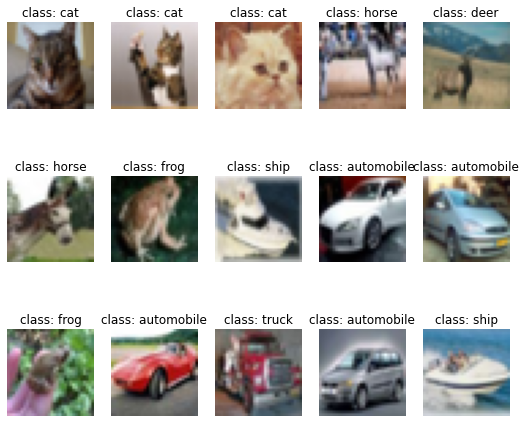

In [8]:
#visualising the dataset
cols = 5
rows = 3
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("class: {}".format(true_label))
plt.show()

In [9]:
#normalize the x dataset
x_train2 = (x_train/255) - 0.5
x_test2 = (x_test/255) - 0.5 

In [10]:
#convert class labels t one-hot encoded vectors ie [4] becomes [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
y_train2 = keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test2 = keras.utils.to_categorical(y_test, NUM_CLASSES)

In [11]:
# we need to define a model which takes (None, 32, 32, 3) input shape and predicts (None, 10) output with probabilities for all classes
# None in shapes stand for batch
def make_model():
  model = Sequential()
  model.add(Conv2D(16,(3,3),padding='same',activation='relu', input_shape=(32,32,3)))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu', input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding='valid', data_format=None))
  model.add(Dropout(0.25))
  model.add(Conv2D(32,(3,3),padding='same',activation='relu', input_shape=(32,32,3)))
  model.add(Conv2D(64,(3,3),padding='same',activation='relu', input_shape=(32,32,3)))
  model.add(MaxPooling2D(pool_size = (2,2), strides = None, padding='valid', data_format=None))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, input_shape = (256,)))
  model.add(Dense(NUM_CLASSES))
  model.add(LeakyReLU(0.1))
  model.add(Activation('softmax'))
  return model

In [12]:
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [13]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 50

# prepare model for fitting (loss, optimizer, etc)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.adamax(lr=INIT_LR),
              metrics=['accuracy'])

def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

model.fit(
    x_train2, y_train2,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test2, y_test2),
)

# Final evaluation of the model 
scores = model.evaluate(x_test2, y_test2, verbose=0) 
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 17s 335us/step - loss: 1.5222 - accuracy: 0.4446 - val_loss: 1.1678 - val_accuracy: 0.5885
Epoch 2/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.1090 - accuracy: 0.6069 - val_loss: 0.9548 - val_accuracy: 0.6718
Epoch 3/50
50000/50000 [==============================] - 9s 190us/step - loss: 0.9701 - accuracy: 0.6594 - val_loss: 0.9230 - val_accuracy: 0.6824
Epoch 4/50
50000/50000 [==============================] - 10s 191us/step - loss: 0.8915 - accuracy: 0.6875 - val_loss: 0.8204 - val_accuracy: 0.7143
Epoch 5/50
50000/50000 [==============================] - 10s 192us/step - loss: 0.8358 - accuracy: 0.7083 - val_loss: 0.8046 - val_accuracy: 0.7133
Epoch 6/50
50000/50000 [==============================] - 10s 190us/step - loss: 0.7914 - accuracy: 0.7252 - val_loss: 0.7939 - val_accuracy: 0.7206
Epoch 7/50
50000/50000 [==============================] -

In [14]:
y_pred_test = model.predict_proba(x_test2)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

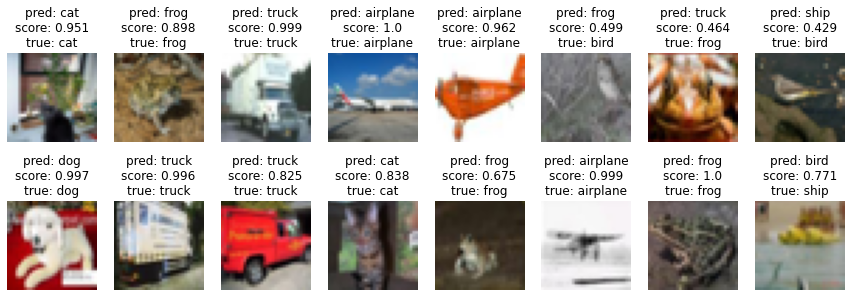

In [15]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()